## Business Understanding
Churn is a critical business problem for companies, especially those  telecommunications and other industries with recurring customer interactions. The cost of acquiring new customers typically exceeds the cost of retaining existing ones.By predicting which customers are likely to churn, the company can focus on retaining them, improving customer satisfaction, and ultimately boosting long-term profitability


## Objective

 The goal of this churn rate prediction model is to identify customers who are at risk of leaving the service (churning), 
 enabling the business to take proactive actions such as targeted marketing or personalized offers to retain them.





## Key Metrics to Track:
 - **Churn Rate**: Percentage of customers who leave in a given period.

- **Customer Lifetime Value (CLV)**: How valuable a customer is over the long term.

 - **Retention Rate**: The percentage of customers retained over a given period.

### Import Libaries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler
from scipy.stats.mstats import winsorize


In [3]:
df= pd.read_csv(r"C:\Users\thion\Downloads\CHURN RATE.csv")

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Data Understanding & Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

5 columns  have categorical variables rest are numerical

In [5]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
df.isnull().mean()

state                     0.0
account length            0.0
area code                 0.0
phone number              0.0
international plan        0.0
voice mail plan           0.0
number vmail messages     0.0
total day minutes         0.0
total day calls           0.0
total day charge          0.0
total eve minutes         0.0
total eve calls           0.0
total eve charge          0.0
total night minutes       0.0
total night calls         0.0
total night charge        0.0
total intl minutes        0.0
total intl calls          0.0
total intl charge         0.0
customer service calls    0.0
churn                     0.0
dtype: float64

No missing values thus no need to procced with handling missing data 

In [7]:
df[df.duplicated()].count()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

No dupliacted values 

In [8]:
df.drop(columns=['phone number'], inplace=True)

df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Droped unnessecary columns 

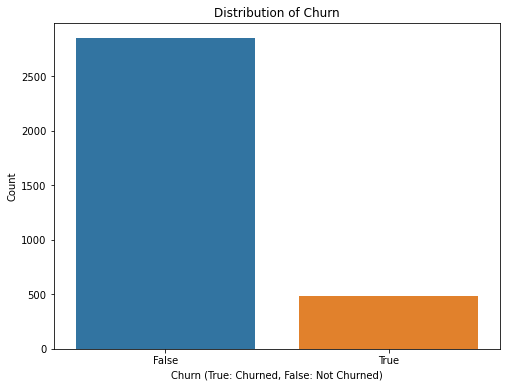

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='churn')  
plt.title('Distribution of Churn')
plt.xlabel('Churn (True: Churned, False: Not Churned)')
plt.ylabel('Count')
plt.show()

In [10]:
y_True = df["churn"][df["churn"] == True]
print ("Churn Percentage = "+str( (y_True.shape[0] / df["churn"].shape[0]) * 100 ))

Churn Percentage = 14.491449144914492


In [11]:
grouped_table_state = df.groupby(["state", "churn"]).size().unstack()

grouped_table_state["churn_percentage"] = (grouped_table_state[True] / (grouped_table_state[True] + grouped_table_state[False])) * 100

grouped_table_state = grouped_table_state.sort_values(by="churn_percentage", ascending=False)

grouped_table_state


churn,False,True,churn_percentage
state,,,
NJ,50,18,26.470588
CA,25,9,26.470588
TX,54,18,25.000000
MD,53,17,24.285714
SC,46,14,23.333333
MI,57,16,21.917808
MS,51,14,21.538462
NV,52,14,21.212121
WA,52,14,21.212121


Text(0.5, 1.0, 'Churn Percentage by State')

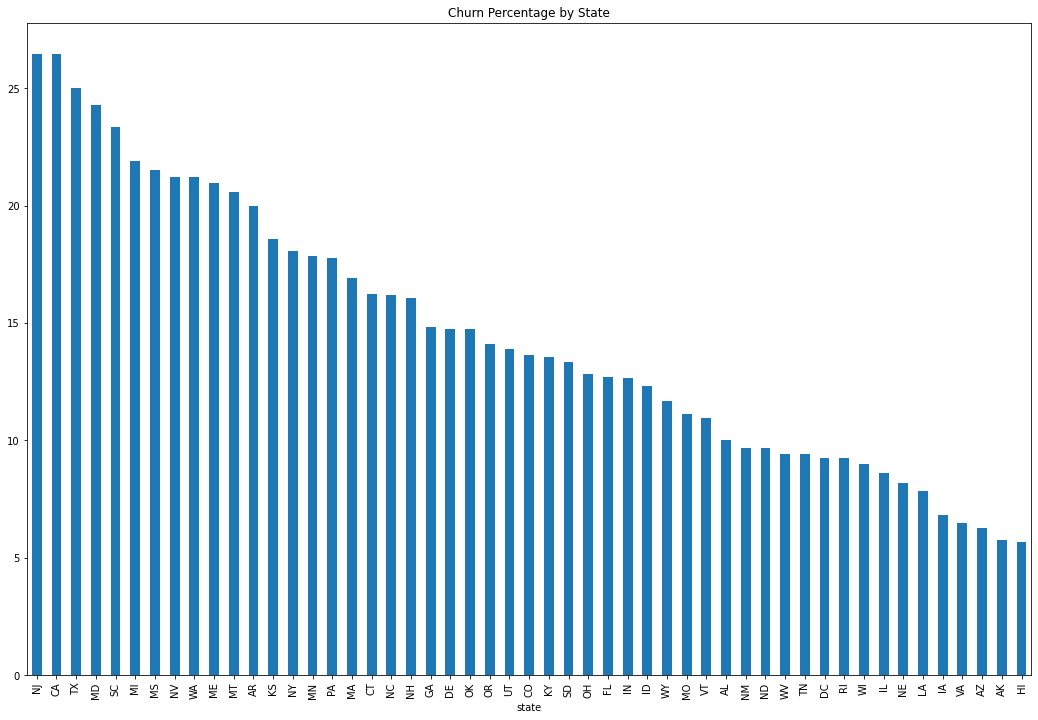

In [12]:
grouped_table_state["churn_percentage"].plot(kind='bar', figsize=(18, 12))
plt.title('Churn Percentage by State')

## Churn corelation with other features 

In [13]:
churn_corr = df.corr()['churn'].sort_values(ascending=False)

churn_corr

churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
Name: churn, dtype: float64

### Business Implications
1. Customer service calls are the biggest churn predictor.
2. Customers with high day-minute usage are more likely to churn
3. International call users are slightly more loyal.
4.  Voicemail users are less likely to churn.

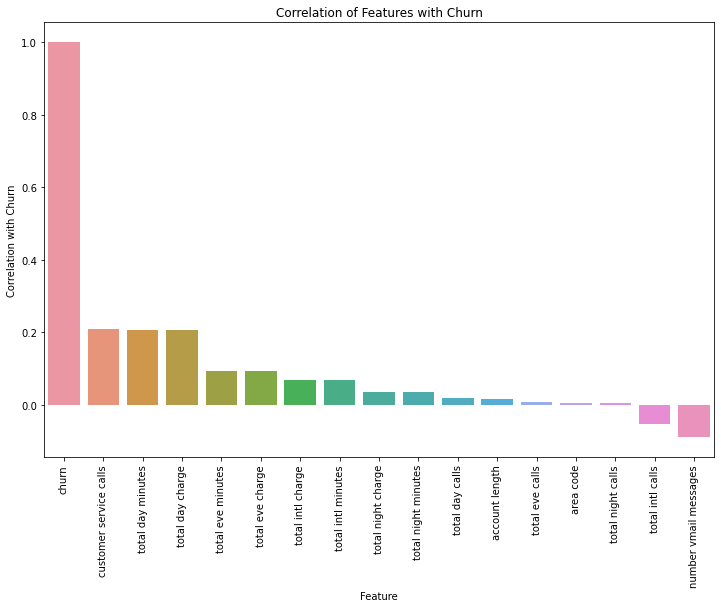

In [14]:
plt.figure(figsize=(12, 8))
churn_corr = df.corr()['churn'].sort_values(ascending=False)
sns.barplot(x=churn_corr.index, y=churn_corr.values)
plt.title('Correlation of Features with Churn')
plt.xlabel('Feature')
plt.ylabel('Correlation with Churn')
plt.xticks(rotation=90)
plt.show()

## Checking  for outilers and handling them 



In [15]:
z_scores = np.abs(df.select_dtypes(include=['number']).apply(zscore))

outliers_zscore = (z_scores > 3).sum()
print("\nOutliers detected using Z-Score:\n", outliers_zscore)



Outliers detected using Z-Score:
 account length             7
area code                  0
number vmail messages      3
total day minutes          9
total day calls            9
total day charge           9
total eve minutes          9
total eve calls            7
total eve charge           9
total night minutes       11
total night calls          6
total night charge        11
total intl minutes        22
total intl calls          50
total intl charge         22
customer service calls    35
dtype: int64


#### Highly Skewed Features (Extreme Outliers)
Total Intl Calls (50 outliers)

Customer Service Calls (35 outliers)

Total Intl Minutes (22 outliers)

Total Intl Charge (22 outliers)

#### Features with extreme values 
Total Day Minutes, Total Eve Minutes, Total Night Minutes (9, 9, and 11 outliers)

Total Day Charge, Total Eve Charge, Total Night Charge (9, 9, and 11 outliers)

Total Calls (Day, Eve, Night) → 9, 7, 6 outliers

In [16]:

df_outiler = df.copy()


 #Capping extreme values
df_outiler['total intl calls'] = winsorize(df_outiler['total intl calls'], limits=[0, 0.05])  
df_outiler['customer service calls'] = winsorize(df_outiler['customer service calls'], limits=[0, 0.05])

#Log Transformation skewed data
log_transform_cols = ['total intl minutes', 'total intl charge', 'total day minutes', 'total day charge',
                      'total eve minutes', 'total eve charge', 'total night minutes', 'total night charge']

for col in log_transform_cols:
    df_outiler[col] = np.log1p(df_outiler[col])  # log1p avoids log(0) issues

# Robust Scaling For features with high variance
scaler = RobustScaler()
scale_cols = ['total intl calls', 'customer service calls']

df_outiler[scale_cols] = scaler.fit_transform(df_outiler[scale_cols])


df_outiler.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,5.583872,110,3.830162,5.290285,99,2.878074,5.504111,91,2.485740,2.397895,-0.333333,1.308333,0.0,False
1,OH,107,415,no,yes,26,5.091293,123,3.348851,5.280662,103,2.869035,5.542831,103,2.521721,2.687847,-0.333333,1.547563,0.0,False
2,NJ,137,415,no,no,0,5.498806,114,3.746677,4.805659,110,2.424803,5.097424,104,2.118662,2.580217,0.333333,1.456287,-1.0,False
3,OH,84,408,yes,no,0,5.705115,71,3.949319,4.141546,88,1.834180,5.287762,89,2.288486,2.028148,1.000000,1.022451,1.0,False
4,OK,75,415,yes,no,0,5.122177,113,3.378952,5.005958,122,2.610805,5.235910,121,2.241773,2.406945,-0.333333,1.316408,2.0,False


## Feature Engineering and Encoding 

### Encoding 

In [17]:

df_engineered = df_outiler.copy()

df_engineered= pd.get_dummies(df_engineered, columns=['state'], drop_first=True)

df_engineered['international plan'] = df_engineered['international plan'].map({'yes': 1, 'no': 0})
df_engineered['voice mail plan'] = df_engineered['voice mail plan'].map({'yes': 1, 'no': 0})

df_engineered.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,0,1,25,5.583872,110,3.830162,5.290285,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,26,5.091293,123,3.348851,5.280662,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0,0,5.498806,114,3.746677,4.805659,110,...,0,0,0,0,0,0,0,0,0,0
3,84,408,1,0,0,5.705115,71,3.949319,4.141546,88,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0,0,5.122177,113,3.378952,5.005958,122,...,0,0,0,0,0,0,0,0,0,0


### Feature engineering 

In [18]:

# 1. International Usage Feature
df_engineered['intl usage'] = df_engineered['total intl minutes'] + df_engineered['total intl calls']

# 2. International to Total Minutes Ratio (Handling Zero Division)
df_engineered['intl to total minutes ratio'] = np.where(
    (df_engineered['total day minutes'] + df_engineered['total eve minutes'] + df_engineered['total night minutes'] + df_engineered['total intl minutes']) == 0,
    0,
    df_engineered['total intl minutes'] / (df_engineered['total day minutes'] + df_engineered['total eve minutes'] + df_engineered['total night minutes'] + df_engineered['total intl minutes'])
)

# 3. Average Call Duration (Handling Zero Division)
df_engineered['avg call duration'] = np.where(
    (df_engineered['total day calls'] + df_engineered['total eve calls'] + df_engineered['total night calls']) == 0,
    0,
    (df_engineered['total day minutes'] + df_engineered['total eve minutes'] + df_engineered['total night minutes']) /
    (df_engineered['total day calls'] + df_engineered['total eve calls'] + df_engineered['total night calls'])
)

# 4. Total Call Count
df_engineered['total calls'] = df_engineered['total day calls'] + df_engineered['total eve calls'] + df_engineered['total night calls']

# 5. Total Call Duration
df_engineered['total minutes'] = df_engineered['total day minutes'] + df_engineered['total eve minutes'] + df_engineered['total night minutes']

# 6. Day vs Night Call Duration Ratio (Handling Zero Division)
df_engineered['day night ratio'] = np.where(
    df_engineered['total night minutes'] == 0,
    0,
    df_engineered['total day minutes'] / df_engineered['total night minutes']
)

# 7. Voice Mail Usage
df_engineered['voice mail activity'] = df_engineered['number vmail messages']

# 8. Voice Mail Plan Usage (Binary Encoding)
df_engineered['vmail plan usage'] = df_engineered['voice mail plan'].apply(lambda x: 1 if x == 'yes' else 0)

# 9. Total Charge
df_engineered['total charge'] = df_engineered['total day charge'] + df_engineered['total eve charge'] + df_engineered['total night charge'] + df_engineered['total intl charge']

# 10. Charge-to-Call Ratio (Handling Zero Division)
df_engineered['charge per call'] = np.where(
    df_engineered['total calls'] == 0,
    0,
    df_engineered['total charge'] / df_engineered['total calls']
)

# 11. Average Charge per Minute (Handling Zero Division)
df_engineered['avg charge per minute'] = np.where(
    df_engineered['total minutes'] == 0,
    0,
    df_engineered['total charge'] / df_engineered['total minutes']
)

# 12. Customer Service Calls Behavior
df_engineered['service calls'] = df_engineered['customer service calls']

# 13. High Spender Feature (Using Median Charge as Threshold)
threshold = df_engineered['total charge'].median()
df_engineered['high spender'] = (df_engineered['total charge'] > threshold).astype(int)



df_engineered.head()


,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total calls,total minutes,day night ratio,voice mail activity,vmail plan usage,total charge,charge per call,avg charge per minute,service calls,high spender
0,128,415,0,1,25,5.583872,110,3.830162,5.290285,99,...,300,16.378269,1.014491,25,0,10.502309,0.035008,0.641234,0.0,1
1,107,415,0,1,26,5.091293,123,3.348851,5.280662,103,...,329,15.914787,0.918537,26,0,10.287169,0.031268,0.646391,0.0,1
2,137,415,0,0,0,5.498806,114,3.746677,4.805659,110,...,328,15.401890,1.078742,0,0,9.746428,0.029715,0.632807,-1.0,0
3,84,408,1,0,0,5.705115,71,3.949319,4.141546,88,...,248,15.134423,1.078928,0,0,9.094436,0.036671,0.600911,1.0,0
4,75,415,1,0,0,5.122177,113,3.378952,5.005958,122,...,356,15.364044,0.978278,0,0,9.547938,0.026820,0.621447,2.0,0


## Model Training

In [19]:
#convert churn column to numerical values
df_engineered['churn'] = df_engineered['churn'].astype(int)

In [20]:
X = df_engineered.drop(columns=['churn'])
y = df_engineered['churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Models trained 

Logistic model 

Accuracy: 0.8515742128935532


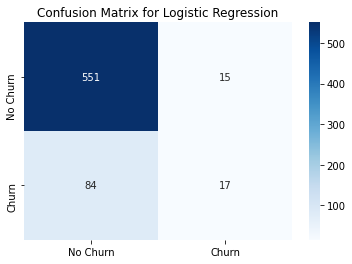

In [39]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
print(f"Accuracy: {logreg_accuracy}")
conf_matrix_logreg = confusion_matrix(y_test, logreg_pred)
sns.heatmap(conf_matrix_logreg, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

Random Forest 

Accuracy: 0.9565217391304348


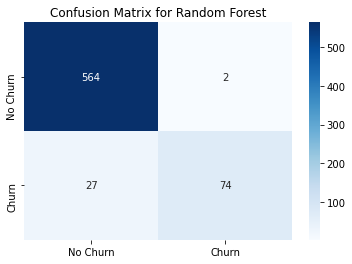

In [38]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Accuracy: {rf_accuracy}")
conf_matrix_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix for Random Forest")
plt.show()

Support Vector Machine 

Accuracy: 0.856071964017991


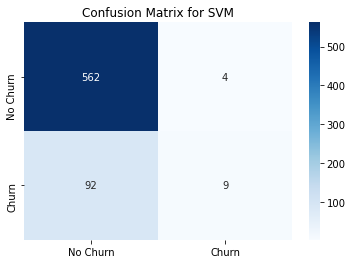

In [37]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"Accuracy: {svm_accuracy}")
conf_matrix_svm = confusion_matrix(y_test, svm_pred)
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix for SVM")
plt.show()

Decision Tree 

Accuracy: 0.9325337331334332


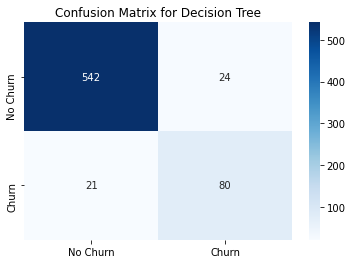

In [36]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Accuracy: {dt_accuracy}")
conf_matrix_dt = confusion_matrix(y_test, dt_pred)
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix for Decision Tree")
plt.show()

K- Nearest Neighbour 

Accuracy: 0.8470764617691154


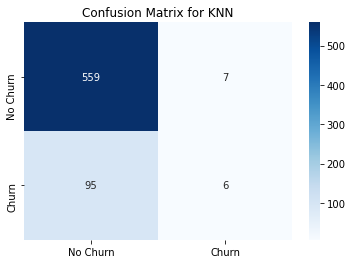

In [35]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"Accuracy: {knn_accuracy}")
conf_matrix_knn = confusion_matrix(y_test, knn_pred)
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix for KNN")
plt.show()


## Evalution of perfomanace Model 


In [40]:

summary_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM', 'Decision Tree', 'KNN'],

    'Accuracy': [logreg_accuracy, rf_accuracy, svm_accuracy, dt_accuracy, knn_accuracy],

    'Precision': [logreg_report['1']['precision'], rf_report['1']['precision'], svm_report['1']
                  ['precision'], dt_report['1']['precision'], knn_report['1']['precision']],

    'Recall': [logreg_report['1']['recall'], rf_report['1']['recall'], svm_report['1']['recall'], dt_report['1']
               ['recall'], knn_report['1']['recall']],

    'F1-Score': [logreg_report['1']['f1-score'], rf_report['1']['f1-score'], svm_report['1']['f1-score'], dt_report['1']
                 ['f1-score'], knn_report['1']['f1-score']]
})


print(summary_table)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.851574   0.531250  0.168317  0.255639
1        Random Forest  0.956522   0.973684  0.732673  0.836158
2                  SVM  0.856072   0.692308  0.089109  0.157895
3        Decision Tree  0.932534   0.769231  0.792079  0.780488
4                  KNN  0.847076   0.461538  0.059406  0.105263


In [41]:
summary_table['Average'] = summary_table[['Accuracy', 'Precision', 'Recall', 'F1-Score']].mean(axis=1)
best_model_index = summary_table['Average'].idxmax()
best_model_name = summary_table.loc[best_model_index, 'Model']

print(f"The best model based on all metrics is: {best_model_name}")

The best model based on all metrics is: Random Forest


### Conclusion:
1. **Model Performance**: Of the models examined, the Random Forest model performed the best, with an accuracy of 95.65%.   This demonstrates that the Random Forest model is quite effective in predicting customer attrition.

2. **Key Predictors**: The investigation found that customer service calls, total day minutes, and total charge are all important predictors of turnover.  Customers that have a high day-minute use and make numerous customer service calls are more likely to churn.

3. **Feature Engineering**: The additional features engineered, such as international usage, average call duration, and total charge, contributed to improving the model's performance.

### Recommendations:
1. **Focus on Customer Service**: Since customer service calls are a significant predictor of churn, improving customer service quality and reducing the number of calls can help in retaining customers. Implementing proactive customer service measures can address issues before they lead to churn.

2. **Targeted Marketing**: Use the churn prediction model to identify high-risk customers and implement targeted marketing strategies, such as personalized offers and discounts, to retain them.

3. **Monitor High Usage Customers**: Customers with high day-minute usage and total charges are more likely to churn. Monitoring these customers and providing them with tailored plans or incentives can help in reducing churn.

4. **Continuous Model Improvement**: Regularly update and retrain the model with new data to ensure its accuracy and effectiveness. Incorporate feedback from marketing and customer service teams to refine the model further.

5. **Customer Feedback**: Collect and analyze customer feedback to identify common pain points and address them promptly. This can help in improving customer satisfaction and reducing churn.